## Importing Libraries

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import os
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics

In [4]:
tf.__version__

'2.1.0-rc1'

## Mounting Google Drive with the notebook

In [5]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'DeepLearning/MUSK/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Loading the Data in a DataFrame

In [0]:
data_dir = pathlib.Path(base_dir)

In [7]:
os.path.exists(data_dir)

True

In [8]:
for name in list(data_dir.glob('*'))[:]:
  print(name)

/content/gdrive/My Drive/DeepLearning/MUSK/Machine Learning Task - Credicxo.docx
/content/gdrive/My Drive/DeepLearning/MUSK/musk_csv.csv
/content/gdrive/My Drive/DeepLearning/MUSK/Models


In [0]:
data = pd.read_csv(root_dir + 'DeepLearning/MUSK/musk_csv.csv')

## Data Exploration & Preprocessing

In [17]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


In [18]:
data.tail()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
6593,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,82,-230,-28,-150,-63,-55,-77,-108,-308,-221,-41,-57,12,-112,-183,-198,-35,137,-198,-168,-153,-51,252,-108,135,-121,119,-120,73,28,...,224,-18,-96,43,1,-76,-53,-38,-23,-176,-32,-205,-95,-124,-139,-153,-170,-178,-102,-113,-42,-67,-141,-96,-112,-113,-47,124,-12,62,-66,164,-14,-29,107,171,-44,-115,118,0
6594,6595,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,68,-225,-32,-124,-77,-43,-74,-100,-291,-215,-25,-49,6,-121,-183,-201,-54,127,-204,-164,-160,-41,255,-117,-104,-14,133,-157,141,46,...,232,-6,-146,-88,-75,-74,-55,-30,-28,-175,-48,-202,-86,-125,-138,-154,-169,-178,-102,-123,-32,-52,-136,-98,-109,-112,-56,-49,-85,60,-51,166,-9,150,129,158,-66,-144,-5,0
6595,6596,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,65,-219,-12,-107,-66,-58,-82,-77,-288,-214,-21,-58,-32,-93,-183,-197,-71,218,-217,-164,-161,-59,243,-117,-103,-14,118,-157,140,-150,...,167,-13,-188,-89,-117,-57,-47,-33,-28,-175,-50,-216,-129,-130,-138,-155,-169,-178,-102,-124,-32,-51,-136,-98,-123,-112,-55,-47,-84,-226,90,117,-8,150,130,159,-66,-144,-6,0
6596,6597,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,79,-224,-30,-129,-54,-60,-86,-88,-307,-221,-39,-58,-12,-86,-184,-180,-61,221,-211,-168,-154,-63,243,-107,136,-121,116,-122,73,-155,...,167,7,-170,43,-6,-61,-47,-43,-23,-176,-33,-212,-131,-113,-139,-153,-170,-178,-103,-114,-42,-66,-141,-96,-123,-113,-46,124,-11,-238,86,99,-14,-31,106,171,-44,-116,117,0
6597,6598,NON-MUSK-jp13,jp13_2+9,51,-122,-23,-106,-117,190,-161,80,-227,-52,-139,-63,-51,-79,-99,-122,-220,-35,-57,6,-104,-183,-196,-51,63,-204,-169,-154,63,128,-108,135,-121,42,-122,73,-90,...,98,-57,-152,43,-4,-69,-51,-37,-23,-175,-33,-209,-108,-125,-139,-153,-170,-178,-102,-115,-42,-66,-141,-96,-110,-113,-46,124,-11,95,40,124,-14,-30,107,171,-44,-115,118,0


In [20]:
data.shape

(6598, 170)

In [0]:
y = data['class']
x = data.drop(['class','ID','molecule_name','conformation_name'],axis=1)

In [22]:
data['conformation_name'].nunique()

6598

In [23]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 166 entries, f1 to f166
dtypes: int64(166)
memory usage: 8.4 MB


Text(0.5, 1.0, 'Classes count')

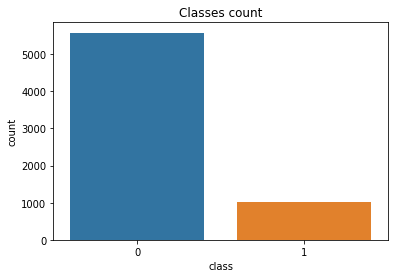

In [24]:
sns.countplot(x='class',data=data)
plt.title("Classes count")

In [0]:
from sklearn.model_selection import train_test_split
np.random.seed(5)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

Text(0.5, 1.0, 'Classes count')

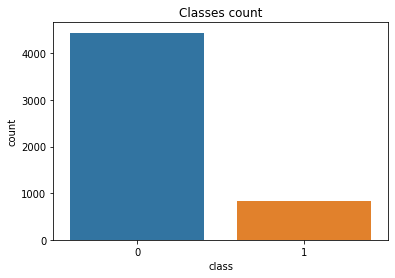

In [26]:
sns.countplot(x=y_train)
plt.title("Classes count")

Text(0.5, 1.0, 'Classes count')

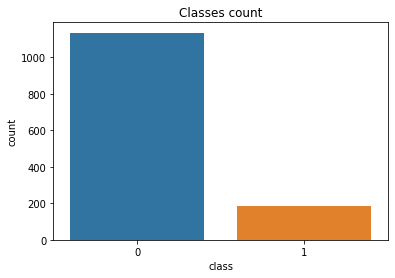

In [27]:
sns.countplot(x=y_test)
plt.title("Classes count")

In [108]:
x.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
count,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,-44.495756,-119.456502,-84.929221,-61.911185,-127.935283,-123.005153,-265.690967,-53.415732,-67.741285,-52.352531,-44.902698,-75.645953,-55.783419,-61.619127,72.506062,32.285238,-69.659139,-15.361018,-102.665959,8.520764,12.553956,-82.314186,25.436193,-34.503183,-78.915732,-73.199000,115.882995,-115.562746,-7.853289,-75.578509,12.700667,...,-46.587754,-19.476811,-68.070627,-94.963474,2.993786,-36.652774,-79.191422,-90.778266,-95.868142,-28.259473,-8.521067,-37.599121,-67.789330,-51.976508,-65.693089,-0.443165,1.331464,-21.754319,-165.748863,-87.364050,-113.114580,-18.523644,-41.386481,8.755077,-55.026069,-61.105335,-54.810397,-76.831161,33.209912,-61.212337,-210.975447,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233
std,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,72.088903,108.911397,79.541410,61.444281,101.191126,98.009158,70.647329,117.237608,61.403085,82.503477,79.304489,75.187995,101.908604,94.524709,123.334433,108.105908,101.325550,91.621335,73.778232,63.484770,126.086157,80.225924,106.627993,57.816952,118.201270,75.350809,57.070192,104.682519,85.732778,70.534415,80.750001,...,86.065208,130.607205,70.016546,98.100733,60.633027,84.316386,61.733776,68.098995,87.253395,61.664300,97.997434,77.580190,94.753428,64.344336,69.094605,82.410293,103.746483,103.113954,54.087579,51.177725,21.463582,63.048333,73.864481,83.274158,60.100098,70.788743,67.538140,76.908685,98.511502,97.547356,83.710890,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085
min,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,-286.000000,-328.000000,-321.000000,-305.000000,-342.000000,-294.000000,-327.000000,-224.000000,-308.000000,-286.000000,-252.000000,-295.000000,-185.000000,-253.000000,-76.000000,-100.000000,-242.000000,-205.000000,-166.000000,-142.000000,-162.000000,-117.000000,-143.000000,-139.000000,-279.000000,-160.000000,-7.000000,-175.000000,-190.000000,-148.000000,-180.000000,...,-286.000000,-221.000000,-307.000000,-189.000000,-123.000000,-140.000000,-319.000000,-338.000000,-336.000000,-196.000000,-197.000000,-199.000000,-243.000000,-283.000000,-290.000000,-185.000000,-157.000000,-171.000000,-179.000000,-106.000000,-136.000000,-200.000000,-213.000000,-190.000000,-140.000000,-128.000000,-114.000000,-173.000000,-143.000000,-198.000000,-257.000000,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000
25%,37.

## Model Creation

In [0]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(64,input_shape=(x.shape[1],),use_bias=False))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(64,use_bias=False))
# model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
# model.add(tf.keras.layers.Dense(64,activation='relu',input_shape=(x.shape[1],),kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
# model.add(tf.keras.layers.Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
# model.add(tf.keras.layers.Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))

model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [196]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 64)                10624     
_________________________________________________________________
batch_normalization_9 (Batch (None, 64)                256       
_________________________________________________________________
activation_12 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 64)                4096      
_________________________________________________________________
activation_13 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 65        
Total params: 15,041
Trainable params: 14,913
Non-trainable params: 128
_______________________________________________

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
# earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=6)
LRR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.0001)

## Model Training

In [198]:
history = model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test))
# history = model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test),callbacks=[LRR])

Train on 5278 samples, validate on 1320 samples
Epoch 1/100
5278/5278 [==============================] - 1s 203us/sample - loss: 0.2194 - accuracy: 0.9149 - val_loss: 0.1382 - val_accuracy: 0.9485
Epoch 2/100
5278/5278 [==============================] - 1s 115us/sample - loss: 0.1205 - accuracy: 0.9532 - val_loss: 0.1198 - val_accuracy: 0.9667
Epoch 3/100
5278/5278 [==============================] - 1s 119us/sample - loss: 0.0903 - accuracy: 0.9659 - val_loss: 0.0826 - val_accuracy: 0.9667
Epoch 4/100
5278/5278 [==============================] - 1s 113us/sample - loss: 0.0727 - accuracy: 0.9701 - val_loss: 0.0566 - val_accuracy: 0.9811
Epoch 5/100
5278/5278 [==============================] - 1s 114us/sample - loss: 0.0643 - accuracy: 0.9725 - val_loss: 0.0859 - val_accuracy: 0.9750
Epoch 6/100
5278/5278 [==============================] - 1s 114us/sample - loss: 0.0485 - accuracy: 0.9829 - val_loss: 0.0334 - val_accuracy: 0.9886
Epoch 7/100
5278/5278 [==============================] - 1

In [0]:
history1 = model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test))

In [0]:
def displayHistory(history,name):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim([min(plt.ylim()),1])
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('loss')
  plt.ylim([0,2.0])
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.savefig(name)
  plt.show()
 


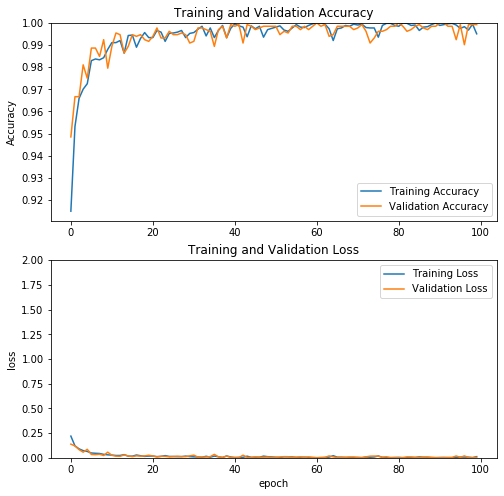

In [199]:
displayHistory(history,root_dir+'DeepLearning/MUSK/Models/model10.png')

## Evaluation

In [0]:
def calculateScores(model):
  # predict probabilities for test set
  yhat_probs = model.predict(X_test, verbose=0)
  # predict crisp classes for test set
  yhat_classes = model.predict_classes(X_test, verbose=0)

  # reduce to 1d array
  yhat_probs = yhat_probs[:, 0]
  yhat_classes = yhat_classes[:, 0]

  # accuracy: (tp + tn) / (p + n)
  accuracy = metrics.accuracy_score(y_test, yhat_classes)
  print('Accuracy: %f' % accuracy)
  # precision tp / (tp + fp)
  precision = metrics.precision_score(y_test, yhat_classes)
  print('Precision: %f' % precision)
  # recall: tp / (tp + fn)
  recall = metrics.recall_score(y_test, yhat_classes)
  print('Recall: %f' % recall)
  # f1: 2 tp / (2 tp + fp + fn)
  f1 = metrics.f1_score(y_test, yhat_classes)
  print('F1 score: %f' % f1)

In [200]:
calculateScores(model)

Accuracy: 0.999242
Precision: 1.000000
Recall: 0.994595
F1 score: 0.997290


In [0]:
model.save(root_dir + 'DeepLearning/MUSK/Models/model10.h5')

In [0]:
model.load_weights(root_dir + 'DeepLearning/MUSK/Models/model10.h5')

## Fine Tuning

In [0]:
# model.compile(optimizer=tf.keras.optimizers.Adam(),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

class myCallback(tf.keras.callbacks.Callback): 
  def on_epoch_end(self, epoch, logs={}): 
    if(logs.get('val_accuracy') is 1.0000):   
      print("\nReached at Validation accuracy of 1.0000")   
      self.model.stop_training = True

LRR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.0001)

In [210]:
history2 = model.fit(X_train,y_train,batch_size=32,epochs=150,validation_data=(X_test,y_test),initial_epoch=100,callbacks=[LRR,myCallback()])

Train on 5278 samples, validate on 1320 samples
Epoch 101/150
5278/5278 [==============================] - 1s 118us/sample - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0035 - val_accuracy: 0.9985
Epoch 102/150
5278/5278 [==============================] - 1s 118us/sample - loss: 7.2620e-04 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 0.9992
Epoch 103/150
5278/5278 [==============================] - 1s 113us/sample - loss: 8.5234e-04 - accuracy: 0.9996 - val_loss: 0.0034 - val_accuracy: 0.9985
Epoch 104/150
5278/5278 [==============================] - 1s 114us/sample - loss: 9.5556e-04 - accuracy: 0.9998 - val_loss: 0.0043 - val_accuracy: 0.9985
Epoch 105/150
5278/5278 [==============================] - 1s 116us/sample - loss: 8.1747e-04 - accuracy: 0.9998 - val_loss: 0.0037 - val_accuracy: 0.9985
Epoch 106/150
5278/5278 [==============================] - 1s 113us/sample - loss: 6.2490e-04 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 0.9985
Epoch 107/150
5278/5278 [=

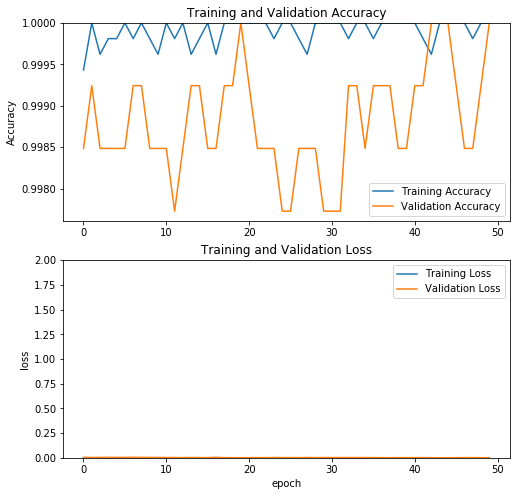

In [212]:
displayHistory(history2,root_dir+'DeepLearning/MUSK/Models/model10finetune.png')

In [211]:
calculateScores(model)

Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000


In [0]:
model.save(root_dir + 'DeepLearning/MUSK/Models/model10finetuned.h5')